# Laboratorio 05: Modelos de ML para predecir la producción

Objetivo:

    Aplicar modelos de regresión para predecir tasas de producción de petróleo/gas.
    Analizar factores influyentes en el rendimiento de los pozos.
    Comparar el rendimiento de diferentes técnicas de regresión.
    Evaluar y comunicar los resultados obtenidos.


In [119]:
# Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
# Carga del dataset
df = pd.read_csv('datos_petroleros_completos.csv')
df.head()

,fecha,pozo,campo,petroleo_bbl,gas_mscf,agua_bbl,presion_cabezal_psi,presion_linea_psi,temperatura_c,choke_percent,horas_operativas,liquido_total,corte_agua,gas_petroleo_ratio,produccion_equivalente,gas_agua_ratio,indice_productividad,eficiencia_termica,indice_trabajo,prod_por_choke
0,2022-01-01,POZO-A,CAMPO-A,1259.605698,1491.465814,203.916905,1791.928342,793.077201,82.209703,42.009378,23.534629,1463.522603,0.139333,1.184074,1508.183334,7.314086,0.702933,18.345564,0.016081,29.983917
1,2022-01-02,POZO-A,CAMPO-A,1181.730032,1429.280662,180.654841,1807.663519,738.785088,74.599645,52.310863,20.364252,1362.384872,0.132602,1.209482,1419.943476,7.911665,0.653733,19.034186,0.014948,22.590528
2,2022-01-03,POZO-A,CAMPO-A,1274.368468,1529.871781,208.609894,1599.779932,789.548837,87.157927,60.121548,23.003376,1482.978362,0.140670,1.200494,1529.347098,7.333649,0.796590,17.546850,0.015512,21.196534
3,2022-01-04,POZO-A,CAMPO-A,1377.735865,1658.166842,166.615958,1891.032767,757.473977,79.661918,43.184130,23.327821,1544.351822,0.107887,1.203545,1654.097005,9.952029,0.728563,20.763961,0.015105,31.903754
4,2022-01-05,POZO-A,CAMPO-A,1165.202656,1359.592698,221.473781,1833.848848,770.973828,80.300655,50.948531,23.924270,1386.676437,0.159716,1.166829,1391.801439,6.138843,0.635386,17.332380,0.017253,22.870191


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   fecha                   1825 non-null   object 
 1   pozo                    1825 non-null   object 
 2   campo                   1825 non-null   object 
 3   petroleo_bbl            1825 non-null   float64
 4   gas_mscf                1825 non-null   float64
 5   agua_bbl                1825 non-null   float64
 6   presion_cabezal_psi     1825 non-null   float64
 7   presion_linea_psi       1825 non-null   float64
 8   temperatura_c           1825 non-null   float64
 9   choke_percent           1825 non-null   float64
 10  horas_operativas        1825 non-null   float64
 11  liquido_total           1825 non-null   float64
 12  corte_agua              1825 non-null   float64
 13  gas_petroleo_ratio      1825 non-null   float64
 14  produccion_equivalente  1825 non-null   

In [122]:
df.columns

Index(['fecha', 'pozo', 'campo', 'petroleo_bbl', 'gas_mscf', 'agua_bbl',
       'presion_cabezal_psi', 'presion_linea_psi', 'temperatura_c',
       'choke_percent', 'horas_operativas', 'liquido_total', 'corte_agua',
       'gas_petroleo_ratio', 'produccion_equivalente', 'gas_agua_ratio',
       'indice_productividad', 'eficiencia_termica', 'indice_trabajo',
       'prod_por_choke'],
      dtype='object')

In [123]:
# Definición de variables
# Independientes
features = ['petroleo_bbl','gas_mscf','agua_bbl',
            'presion_cabezal_psi', 'presion_linea_psi', 'temperatura_c',
       'choke_percent']
# Dependiente
target = 'horas_operativas'

In [124]:
# subset para evaluar y hacer el modelo
subset = df[features + [target]]

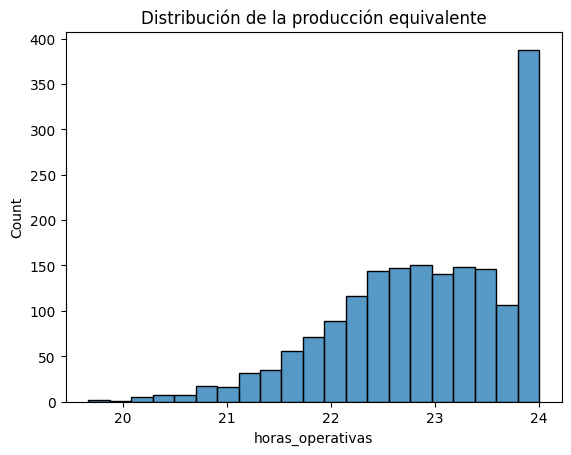

In [125]:
sns.histplot( df[target] )
plt.title('Distribución de la producción equivalente')
plt.show()

In [126]:
prueba = "test"
print(f' Gráfico XY de produccion_equivalente vs {prueba} ')

 Gráfico XY de produccion_equivalente vs test 


In [127]:
for i in features:
    print(i)
    print('fin de ciclo')

petroleo_bbl
fin de ciclo
gas_mscf
fin de ciclo
agua_bbl
fin de ciclo
presion_cabezal_psi
fin de ciclo
presion_linea_psi
fin de ciclo
temperatura_c
fin de ciclo
choke_percent
fin de ciclo


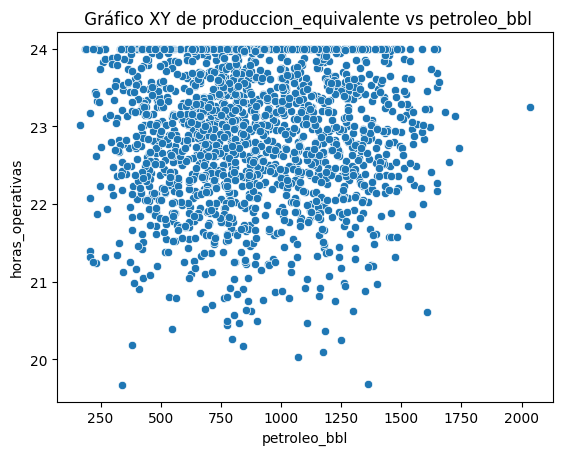

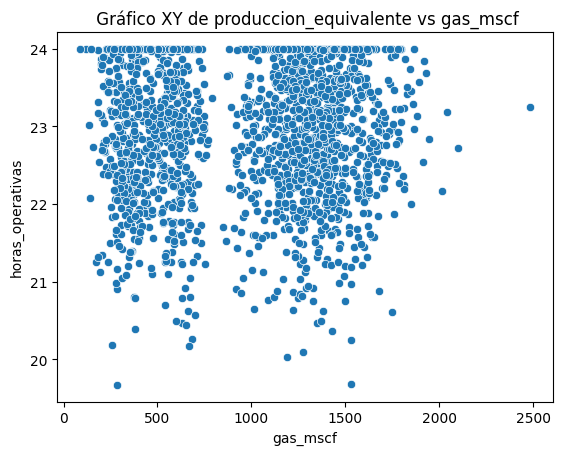

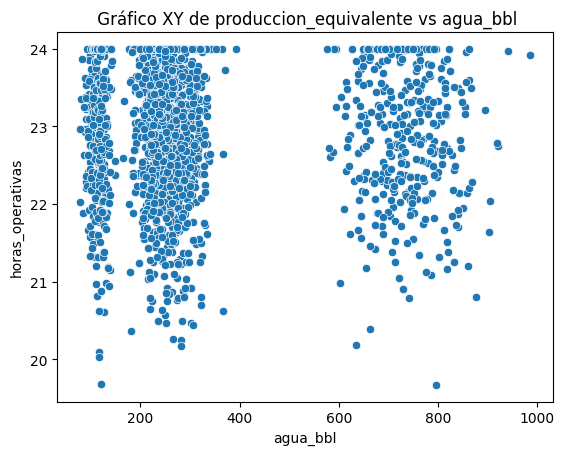

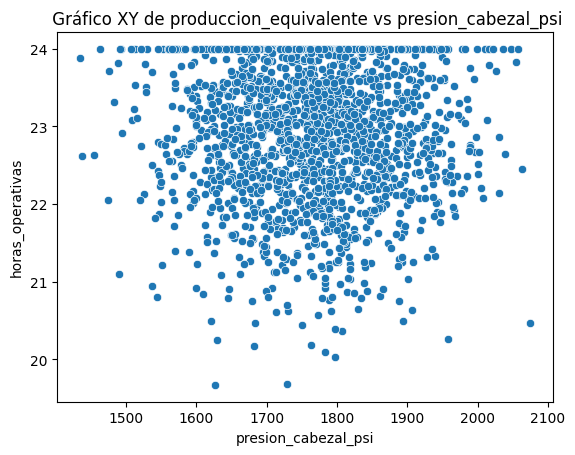

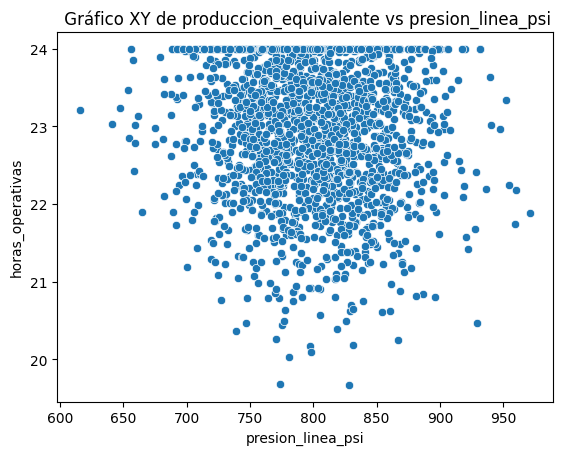

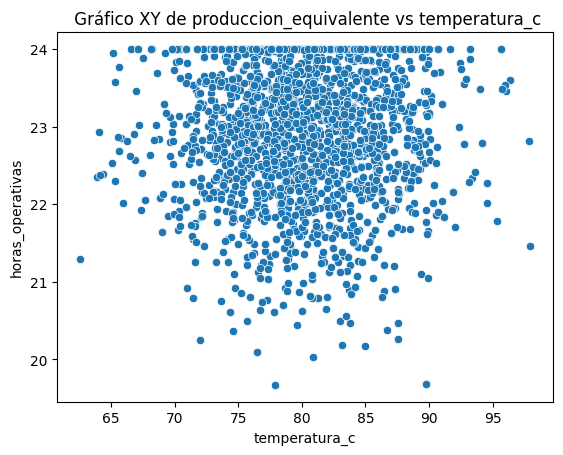

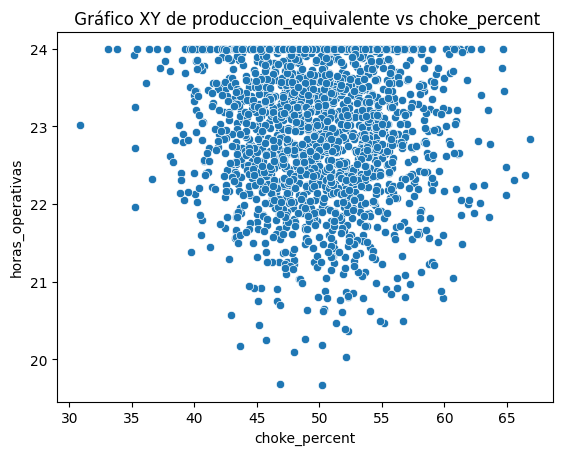

In [128]:
# Diagrama XY (Scatterplot)
# 
for f in features:
    sns.scatterplot(x = df[ f ] ,y=df[target])
    plt.title(f' Gráfico XY de produccion_equivalente vs {f}')
    plt.show()

<Axes: >

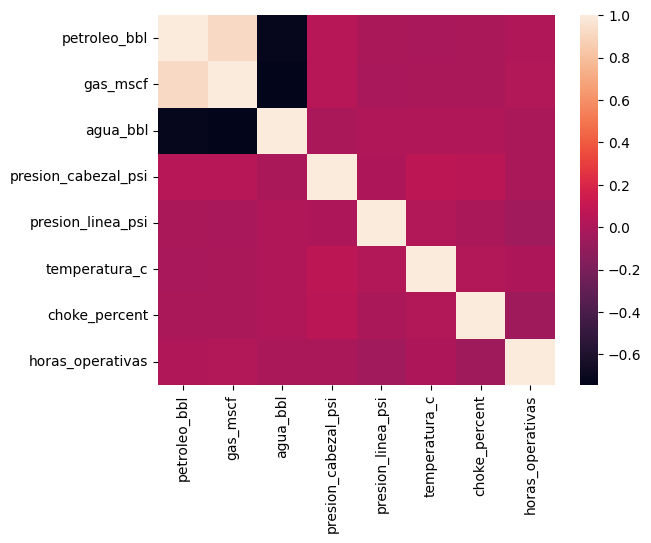

In [129]:

sns.heatmap(  subset.corr() )

<Axes: >

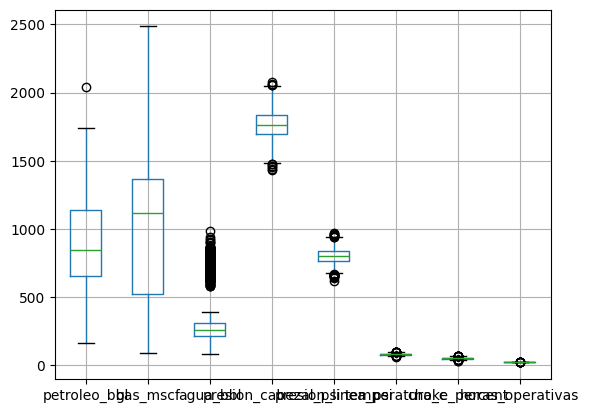

In [130]:
subset.boxplot()

## Escalamiento de variables independientes con StandardScaler

In [131]:
# Librería de Normalización
from sklearn.preprocessing import StandardScaler

# Activación
scaler = StandardScaler()

X = scaler.fit_transform(df[features])

In [132]:
pd.DataFrame(X)

,0,1,2,3,4,5,6
0,1.153576,1.094838,-0.556422,0.267647,-0.147168,0.397267,-1.580141
1,0.915691,0.963441,-0.663699,0.418569,-1.239954,-1.000068,0.463324
2,1.198671,1.175989,-0.534779,-1.575321,-0.218187,1.305844,2.012699
3,1.514425,1.447076,-0.728441,1.218194,-0.863786,-0.070549,-1.347110
4,0.865205,0.816190,-0.475456,0.669722,-0.592063,0.046734,0.193083
...,...,...,...,...,...,...,...
1820,-1.347458,-1.439760,2.275902,-1.163248,0.764141,0.211258,-1.234886
1821,-1.070532,-1.305817,2.283870,0.237555,0.533597,0.565571,0.308131
1822,-0.807800,-1.222133,2.001726,-0.487934,0.714610,0.581670,0.551859
1823,-1.241890,-1.286258,2.155227,-0.319073,1.351807,-0.879153,0.724819


<Axes: >

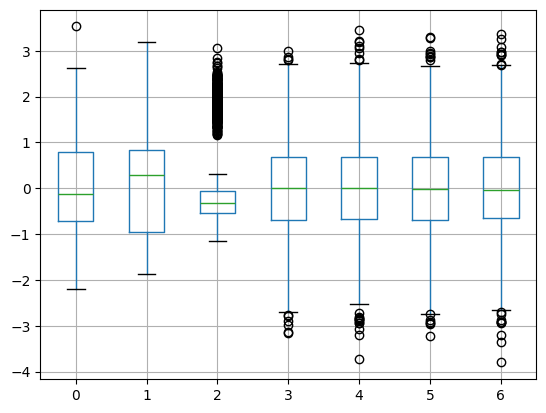

In [133]:
pd.DataFrame(X).boxplot()

## Partición de datos

In [134]:
X = df[features]
y = df[target]

In [135]:
# Librería para partir los datos
from sklearn.model_selection import train_test_split

In [136]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.2, random_state= 23)

In [137]:
X_train_scale = scaler.fit_transform(X_train)

In [138]:
X_test_scale = scaler.transform(X_test)

<Axes: >

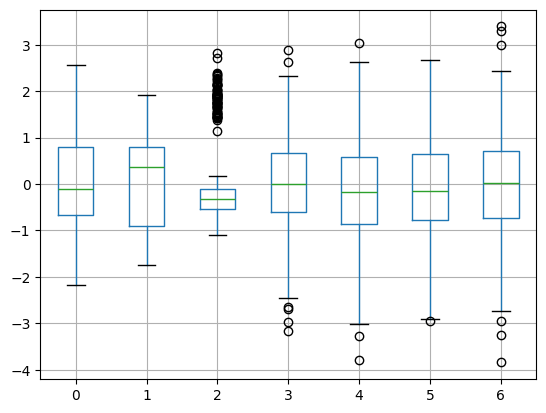

In [139]:
pd.DataFrame(X_test_scale).boxplot()

## Creación del Modelo de RL

In [140]:
# Carga del modelo
from sklearn.linear_model import LinearRegression

In [141]:
# Llamado a clase del modelo seleccionado
model = LinearRegression()
# Ajuste del modelo con los datos de entrenamiento escalado
model.fit(X_train_scale, y_train)

LinearRegression()

In [142]:
# Se valida la parte de predicción
y_predict = model.predict(X_test_scale)

In [143]:
pd.DataFrame(data={'y_verdadera' : y_test, 'y_prediccion':y_predict})

,y_verdadera,y_prediccion
444,22.936426,22.809774
1721,23.583405,22.968006
1065,23.292829,22.949342
1507,22.622010,22.786981
1134,23.053384,22.848929
...,...,...
801,21.791141,23.146867
131,23.469268,23.051394
314,24.000000,23.025876
141,24.000000,22.885222


## Métricas de evaluación

In [144]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [145]:
mean_squared_error(y_test, y_predict)

0.7201031030379405

In [146]:
mean_absolute_error(y_test,y_predict)

0.7035745623819168

In [147]:
r2_score(y_test,y_predict)

-0.003836419807796254

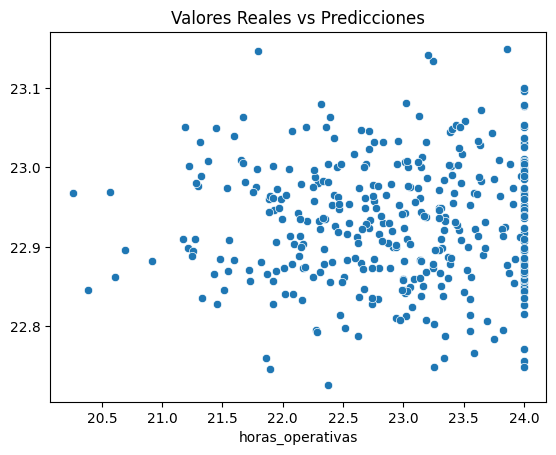

In [148]:
sns.scatterplot( x=y_test,y= y_predict)
plt.title('Valores Reales vs Predicciones')
plt.show()